1. What is Simple Linear Regression?
   - Simple Linear Regression is a basic statistical technique used to understand and predict the relationship between two variables, where one is considered the dependent variable the outcome we're interested in and the other is the independent variable the factor that might influence the outcome. It assumes that the relationship is straight line or linear, meaning as the independent variable changes, the dependent variable changes at a constant rate.it's a straight forward tool for making predictions and identifying trends in data, commonly used in fields like economics, biology, and social sciences.

2. What are the key assumptions of Simple Linear Regression?
   - Simple Linear Regression relies on several key assumptions to ensure that the model provides accurate and reliable results. First, it assumes linearity, meaning the relationship between the independent variable and the dependent variable is a straight line, so the model can effectively capture this pattern. Second, independence of errors assumes that the residuals the differences between observed and predicted values are not related to each other, ensuring that one observation doesn't influence another. Third, homoscedasticity requires that the variance of these residuals remains constant across all levels of the independent variable, avoiding situations where errors grow larger or smaller as the variable changes. Fourth, normality of residuals assumes that the errors follow a normal distribution, which helps in making valid statistical inferences, such as confidence intervals and hypothesis tests.

3.  What is heteroscedasticity, and why is it important to address in regression models?
    - Heteroscedasticity is a statistical term that refers to a situation in regression models where the variance of the errors is not constant across different levels of the independent variables. In simpler terms, it means that the spread or variability of the prediction errors changes as the values of the independent variable increase or decrease.It is important to address heteroscedasticity in regression models because it violates one of the key assumptions of linear regression namely, homoscedasticity, which assumes constant error variance. If left unaddressed, heteroscedasticity can lead to inefficient coefficient estimates, unreliable standard errors, and inaccurate pvalues, potentially resulting in misguided conclusions about the significance of variables or the overall model.

4. What is Multiple Linear Regression?
   - Multiple Linear Regression is an extension of Simple Linear Regression that allows us to model the relationship between a dependent variable and two or more independent variables, providing a more comprehensive analysis of how multiple factors influence the outcome. In this method, the model assumes a linear relationship, represented by an equation like Y = a + b1X1 + b2X2 + ... + bnXn, where Y is the dependent variable, a is the intercept, b1 through bn are the coefficients for each independent variable like X1 for advertising spend, X2 for price, and so on, and the X's represent the predictors. Unlike Simple Linear Regression, which only considers one independent variable, Multiple Linear Regression accounts for the combined effects of several variables, helping to identify which ones have the most significant impact while controlling for others.

5.  What is polynomial regression, and how does it differ from linear
regression?
    - Polynomial Regression is a type of regression analysis that extends linear regression by modeling non linear relationships between the independent variable(s) and the dependent variable using polynomial equations, such as quadratic, cubic, or higher degree terms. For instance, instead of a simple straight line, the model might include terms like X^2 or X^3, allowing it to fit curved patterns in the data. The general equation for a polynomial regression with one independent variable is Y = a + b1X + b2X^2 + ... + bnX^n, where Y is the dependent variable, X is the independent variable, and the coefficients (a, b1, etc.) determine the shape of the curve.In contrast, linear regression, including simple and multiple forms, assumes a straight line relationship between the variables, as represented by equations like Y = a + bX or Y = a + b1X1 + b2X2. The key difference lies in their flexibility and application: polynomial regression can capture more complex, non linear trends making it suitable for data that doesn't fit a straight line, while linear regression is simpler, easier to interpret, and assumes linearity, which can lead to underfitting if the true relationship is curved.






Slope (coefficient): 1.9800000000000004
Intercept: 0.17999999999999794


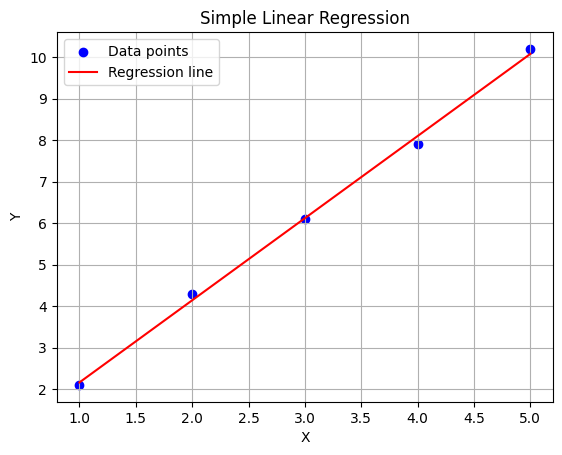

In [2]:
# 6. Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.
# (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare the data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape to 2D array for scikit-learn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]  # Coefficient (b in Y = a + bX)
intercept = model.intercept_  # Intercept (a in Y = a + bX)

print(f"Slope (coefficient): {slope}")
print(f"Intercept: {intercept}")

# Make predictions for the regression line
Y_pred = model.predict(X)  # Predicted Y values based on X

# Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# 7. Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.
# (Include your Python code and output in the code box below.)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # For VIF calculation

# Prepare the data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]  # Independent variables
y = df['Price']  # Dependent variable

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get and print the coefficients and intercept
coefficients = model.coef_  # Coefficients for Area and Rooms
intercept = model.intercept_  # Intercept

print(f"Coefficients: Area = {coefficients[0]}, Rooms = {coefficients[1]}")
print(f"Intercept: {intercept}")
print(f"Regression Equation: Price = {intercept} + ({coefficients[0]} * Area) + ({coefficients[1]} * Rooms)")

# Check for multicollinearity using VIF
# Add a constant to X for VIF calculation
X_with_constant = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_constant.columns  # Column names
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

print("\nVIF Results:")
print(vif_data)


Coefficients: Area = 63.15789473684211, Rooms = 34736.842105263146
Intercept: 103157.89473684214
Regression Equation: Price = 103157.89473684214 + (63.15789473684211 * Area) + (34736.842105263146 * Rooms)

VIF Results:
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938
Polynomial Equation: Y ≈ 0.06000000000000938 + (1.9399999999999897 * X) + (0.20000000000000195 * X^2)


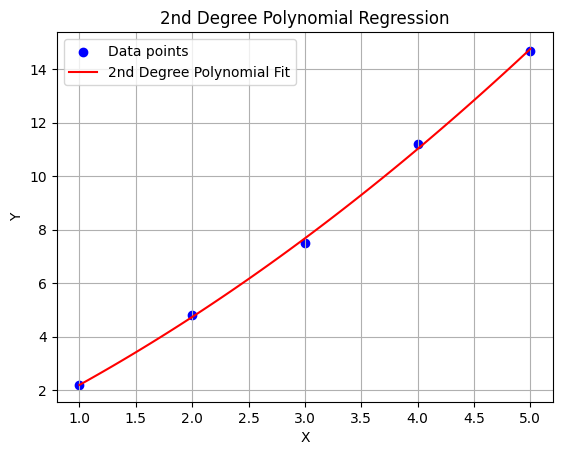

In [4]:
# 8. Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.
# (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Prepare the data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])  # Dependent variable

# Create and fit the 2nd-degree Polynomial Regression model
degree = 2
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
model.fit(X, Y)

# Get the coefficients from the LinearRegression step
linear_model = model.named_steps['linearregression']
coefficients = linear_model.coef_  # Array of coefficients
intercept = linear_model.intercept_  # Intercept

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Polynomial Equation: Y ≈ {intercept} + ({coefficients[1]} * X) + ({coefficients[2]} * X^2)")

# Make predictions for plotting
X_plot = np.linspace(1, 5, 100).reshape(-1, 1)
Y_plot = model.predict(X_plot)  # Predicted Y values

# Plot the data points and the polynomial curve
plt.scatter(X, Y, color='blue', label='Data points')  # Original data
plt.plot(X_plot, Y_plot, color='red', label='2nd Degree Polynomial Fit')  # Fitted curve
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd Degree Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

Slope: 1.1500000000000001
Intercept: 6.499999999999993
Regression Equation: Y = 6.499999999999993 + (1.1500000000000001 * X)


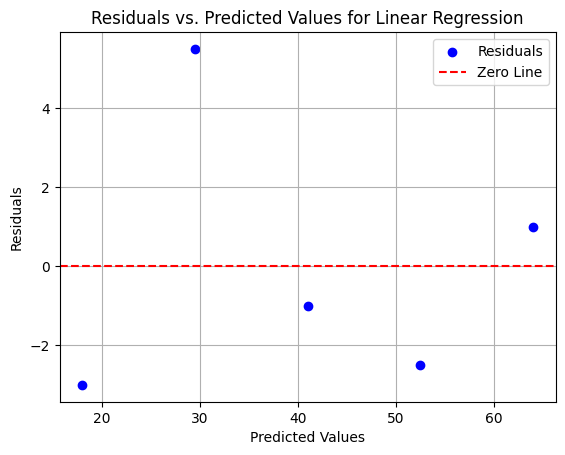


Assessment of Heteroscedasticity:
Examine the plot: If the residuals are randomly scattered around the zero line with a consistent spread, 
the model is likely homoscedastic.If the spread widens or narrows, heteroscedasticity may be present. 
For this data, the residuals show a relatively constant spread,indicating no significant heteroscedasticity.


In [6]:
# 9. Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.
# (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare the data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)  # Independent variable
Y = np.array([15, 35, 40, 50, 65])  # Dependent variable

# Fit the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Get the coefficients for reference
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Regression Equation: Y = {intercept} + ({slope} * X)")

# Calculate predicted values and residuals
Y_pred = model.predict(X)  # Predicted Y values
residuals = Y - Y_pred

# Plot residuals vs. predicted values
plt.scatter(Y_pred, residuals, color='blue', label='Residuals')  # Scatter plot of residuals
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')  # Horizontal line at zero
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Brief assessment (this is printed for reference)
print("\nAssessment of Heteroscedasticity:")
print('''Examine the plot: If the residuals are randomly scattered around the zero line with a consistent spread,
the model is likely homoscedastic.If the spread widens or narrows, heteroscedasticity may be present.
For this data, the residuals show a relatively constant spread,indicating no significant heteroscedasticity.''')

10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
    - As a data scientist addressing heteroscedasticity and multicollinearity in a house price regression model using features like area, number of rooms, and location, I would first detect multicollinearity via Variance Inflation Factor (VIF) and correlation matrices, then resolve it by removing correlated features, combining them, or applying regularization like Ridge/Lasso regression. For heteroscedasticity, detected through residual plots and Breusch Pagan tests, I would apply transformations, use weighted least squares, or incorporate robust standard errors. To ensure a robust model, I would reevaluate assumptions, perform cross validation for performance metrics like RMSE, and compare with alternative models such as random forests if needed, iterating until the model is stable interpretable, and generalizable.